# Create multiclass classification models
It's also possible to create multiclass classification models, in which there are more than two possible classes. For example, the health clinic might expand the diabetes model to classify patients as:

Non-diabetic

Type-1 diabetic

Type-2 diabetic.

The individual class probability values would still add up to a total of 1 as the patient is definitely in only one of the three classes, and the most probable class would be predicted by the model.

Using Multiclass classification models
Multiclass classification can be thought of as a combination of multiple binary classifiers. There are two ways in which you approach the problem:

**One vs Rest (OVR)**, in which a classifier is created for each possible class value, with a positive outcome for cases where the prediction is this class, and negative predictions for cases where the prediction is any other class. For example, a classification problem with four possible shape classes (square, circle, triangle, hexagon) would require four classifiers that predict:

square or not

circle or not

triangle or not

hexagon or not


**One vs One (OVO)**, in which a classifier for each possible pair of classes is created. The classification problem with four shape classes would require the following binary classifiers:

square or circle

square or triangle

square or hexagon

circle or triangle

circle or hexagon

triangle or hexagon 

In both approaches, the overall model must take into account all of these predictions to determine which single category the item belongs to.


Fortunately, in most machine learning frameworks, including scikit-learn, implementing a multiclass classification model is not significantly more complex than binary classification - and in most cases, the estimators used for binary classification implicitly support multiclass classification by abstracting an OVR algorithm, an OVO algorithm, or by allowing a choice of either.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')


--2023-08-14 00:24:58--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: 'penguins.csv'

     0K ......                                                100%  777K=0.009s

2023-08-14 00:24:58 (777 KB/s) - 'penguins.csv' saved [7086/7086]



In [2]:
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [3]:
sample=penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
250,48.4,14.4,203.0,4625.0,1
204,45.1,14.4,210.0,4400.0,1
4,36.7,19.3,193.0,3450.0,0
224,48.2,15.6,221.0,5100.0,1
98,33.1,16.1,178.0,2900.0,0
158,45.4,14.6,211.0,4800.0,1
154,48.7,14.1,210.0,4450.0,1
20,37.8,18.3,174.0,3400.0,0
262,50.5,15.2,216.0,5000.0,1
315,53.5,19.9,205.0,4500.0,2


The dataset contains the following columns:
* **CulmenLength**: The length in mm of the penguin's culmen (bill).
* **CulmenDepth**: The depth in mm of the penguin's culmen.
* **FlipperLength**: The length in mm of the penguin's flipper.
* **BodyMass**: The body mass of the penguin in grams.
* **Species**: An integer value that represents the species of the penguin.

The **Species** column is the label we want to train a model to predict. The dataset includes three possible species, which are encoded as 0, 1, and 2. The actual species names are revealed by the code below:

In [9]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
#for index, row in penguins.sample(10).iterrows():
#    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName


In [27]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index,row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 51.3 19.9 198.0 3700.0 2 ] Chinstrap
[ 36.2 17.2 187.0 3150.0 0 ] Adelie
[ 46.2 17.5 187.0 3650.0 2 ] Chinstrap
[ 51.1 16.3 220.0 6000.0 1 ] Gentoo
[ 45.6 19.4 194.0 3525.0 2 ] Chinstrap
[ 45.8 18.9 197.0 4150.0 0 ] Adelie
[ 45.5 15.0 220.0 5000.0 1 ] Gentoo
[ 50.0 15.2 218.0 5700.0 1 ] Gentoo
[ 39.2 21.1 196.0 4150.0 0 ] Adelie
[ 37.7 19.8 198.0 3500.0 0 ] Adelie


In [21]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [5]:
penguins.shape

(344, 5)

In [6]:
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [29]:
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [30]:
penguins=penguins.dropna()

In [31]:
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

Let's see how our features relates to label by using boxplot

In [33]:
from matplotlib import pyplot as plt

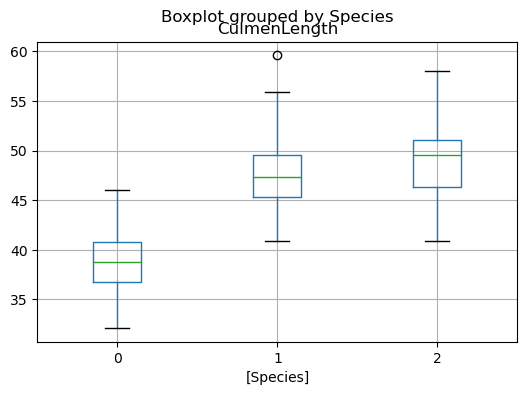

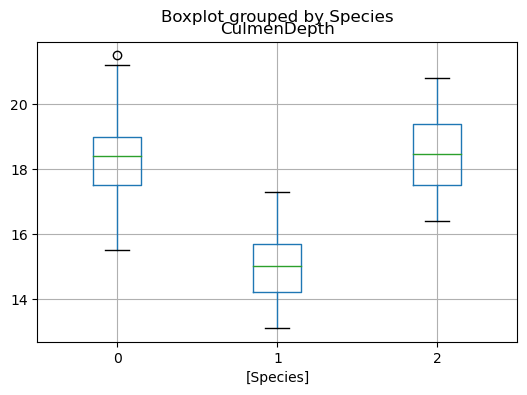

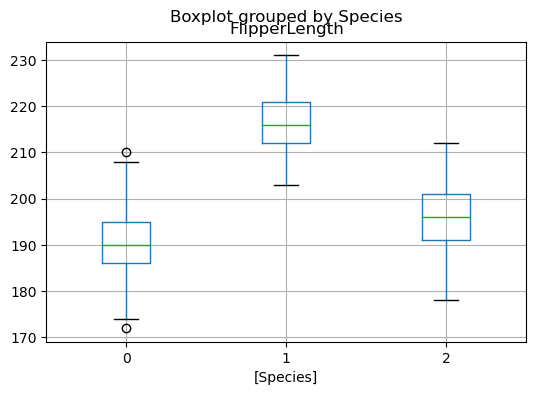

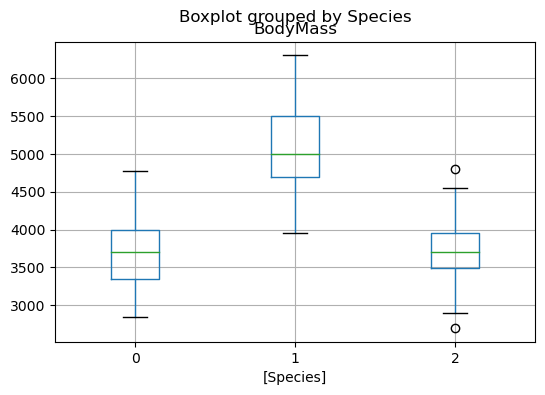

In [34]:
features=['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label=['Species']
for col in features:
    penguins.boxplot(column=col,by=label,figsize=(6,4))
    plt.title(col)
plt.show()

From the box plots, it looks like species 0 and 2 (Adelie and Chinstrap) have similar data profiles for culmen depth, flipper length, and body mass, but Chinstraps tend to have longer culmens. Species 1 (Gentoo) tends to have fairly clearly differentiated features from the others; which should help us train a good classification model.

In [36]:
X=penguins[features].values
y=penguins[label].values

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

print('X_train size: ',str(X_train.shape),'\nX_test size: ',str(X_test.shape))

X_train size:  (239, 4) 
X_test size:  (103, 4)


## Train and Evaluate multiclass classifier

In [39]:
from sklearn.linear_model import LogisticRegression

reg=0.1

multi_model=LogisticRegression(C=1/reg,solver='lbfgs',multi_class='auto',max_iter=10000).fit(X_train,y_train)
print(multi_model)

LogisticRegression(C=10.0, max_iter=10000)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
predictions= multi_model.predict(X_test)
print('Predicted Labels: ',predictions)
print('Actual Labels:',y_test)

Predicted Labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2 1 2 1 0 2 0 2 0 2 0 0 0 1 2 0 0 0 0 2 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 2 0 1 1 1 1 1 2 0 2 0 0 2
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 2 0 0 0 1 2 2 0 0 1 0 1 0 2]
Actual Labels: [[0]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]]


## performance metrics

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy score:',accuracy_score(y_test,predictions))
print('Overall Precision Score',precision_score(y_test,predictions,average='macro'))
print('Overall Recall Score',recall_score(y_test,predictions,average='macro'))

Accuracy score: 0.970873786407767
Overall Precision Score 0.9688405797101449
Overall Recall Score 0.9608465608465608


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


The confusion matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map, like this:

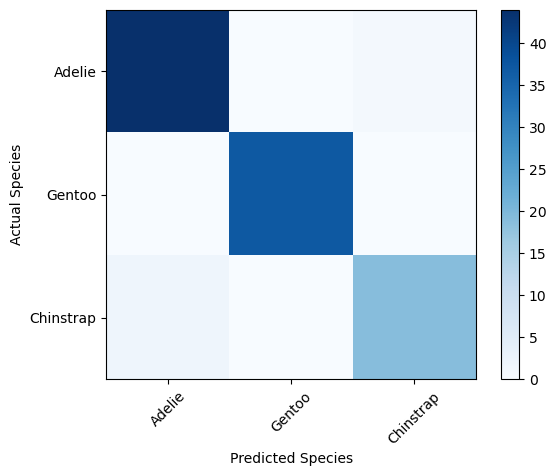

In [50]:
import numpy as np
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks=np.arange(len(penguin_classes))
plt.xticks(tick_marks,penguin_classes,rotation=45)
plt.yticks(tick_marks,penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

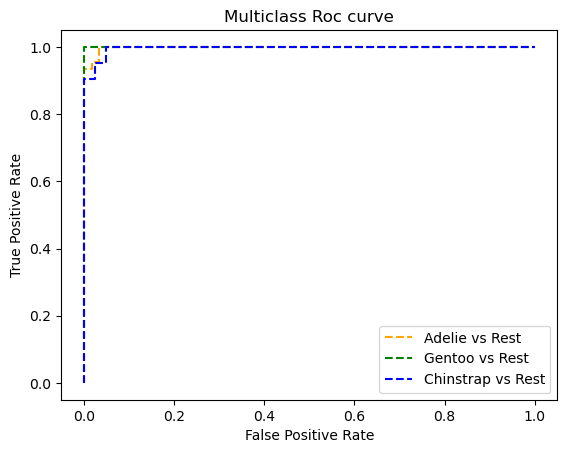

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# get class probabillity scores
y_score=multi_model.predict_proba(X_test)
fpr={}
tpr={}
threshold={}
for i in range(len(penguin_classes)):
    fpr[i],tpr[i],threshold[i]=roc_curve(y_test,y_score[:,i],pos_label=i)

#plot the ROC curve
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass Roc curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [54]:
auc=roc_auc_score(y_test,y_score,multi_class='ovr')
print('auc:',auc)

auc: 0.9981999902100828


## Preprocess data in pipeline

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (normalize or scale them)
numeric_features=[0,1,2,3]
numeric_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())])
preprocessor= ColumnTransformer(
    transformers=[
        ('preprocess',numeric_transformer,numeric_features)])

pipeline= Pipeline(steps=[('preprocessor',preprocessor),
                          ('regressor',SVC(probability=True))])

multi_model=pipeline.fit(X_train,y_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Value:  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2 1 2 1 0 2 0 2 0 2 0 0 0 1 2 0 0 0 0 2 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 2 0 1 1 1 1 1 2 0 2 0 0 2
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 2 0 0 0 1 2 2 0 0 1 0 1 0 2]
Overall Accuracy Score:  0.9805825242718447
Overall precision Score:  0.9767195767195768
Overall Recall Score:  0.9767195767195768
Average Auc:  0.9990361381446328
[[44  0  1]
 [ 0 37  0]
 [ 1  0 20]]


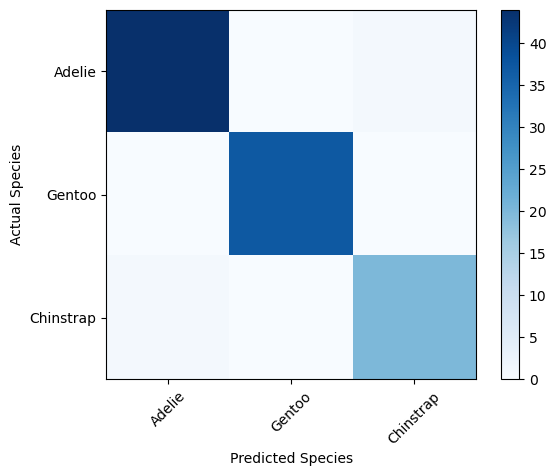

In [64]:
prediction=multi_model.predict(X_test)
y_score=multi_model.predict_proba(X_test)

print('Predicted Value: ',prediction)
#print('Actual Value: ',y_test)

print("Overall Accuracy Score: ",accuracy_score(y_test,prediction))
print('Overall precision Score: ',precision_score(y_test,prediction,average='macro'))
print('Overall Recall Score: ',recall_score(y_test,prediction,average='macro'))
print('Average Auc: ',roc_auc_score(y_test,y_score,multi_class='ovr'))

# Confusion Matrix
cm=confusion_matrix(y_test,prediction)
print(cm)
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks=np.arange(len(penguin_classes))
plt.xticks(tick_marks,penguin_classes,rotation=45)
plt.yticks(tick_marks,penguin_classes)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

In [65]:
import joblib

filename= './penguins_model.pkl'
joblib.dump(multi_model,filename)

['./penguins_model.pkl']

so now we have a trained model. Let's use it to predict the class of a new penguin observation:

In [67]:
multi_model=joblib.load(filename)

X_new=np.array([[55.2,17.4,202,5510]])
print('New Sample :{}'.format(X_new[0]))

penguin_pred= multi_model.predict(X_new)[0]
print('Predicted class is : ',penguin_classes[penguin_pred])

New Sample :[  55.2   17.4  202.  5510. ]
Predicted class is :  Gentoo


You can also submit a batch of penguin observations to the model, and get back a prediction for each one.

In [70]:
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
                  [38.2,20.1,190,3900],
                  [60.1,56.2,300,5600]])
print ('New samples:\n{}'.format(x_new))

prediction= multi_model.predict(x_new)
for pred in prediction:
    print('Predictions : ',penguin_classes[pred])


New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]
 [  60.1   56.2  300.  5600. ]]
Predictions :  Chinstrap
Predictions :  Adelie
Predictions :  Adelie


Classification is one of the most common forms of machine learning, and by following the basic principles we've discussed in this notebook you should be able to train and evaluate classification models with scikit-learn.